# IMDb_ Data Analysis & Visualization Project

Lea Khairallah - Jean Virgile APOVO - Behdad YAHYAVI TAJ ABADI
# This project has two goals:
##### 1) DATA ANALYSIS
###### To analyse a dataset of 10,000 movies on IMDb
##### 2) ALLOWING A USER TO QUERY A MOVIE'S INFORMATIONS.
###### To have an input parameter where user can input a movie's name, and receive information about it.
###### *Reference for the dataset used in this project: https://www.kaggle.com/datasets*

In [3]:
# First,let's import the libraries that we need
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import os
#OS to read the file
import pandas_datareader as pdr

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
#to see plots in notebook

## *1 ) DATA ANALYSIS*
### *1.1) Let's Read the file*

In [5]:
# To import the csv file
data = pd.read_csv("movies.csv")
#To only read the head
data.head()

,Rank,Title,Year,Score,Metascore,Genre,Vote,Director,Runtime,Revenue,Description
0,1,The Shawshank Redemption,1994,9.3,80.0,Drama,2011509,Frank Darabont,142,28.34,Two imprisoned men bond over a number of years...
1,2,The Dark Knight,2008,9.0,84.0,"Action, Crime, Drama",1980200,Christopher Nolan,152,534.86,When the menace known as the Joker emerges fro...
2,3,Inception,2010,8.8,74.0,"Action, Adventure, Sci-Fi",1760209,Christopher Nolan,148,292.58,A thief who steals corporate secrets through t...
3,4,Fight Club,1999,8.8,66.0,Drama,1609459,David Fincher,139,37.03,An insomniac office worker and a devil-may-car...
4,5,Pulp Fiction,1994,8.9,94.0,"Crime, Drama",1570194,Quentin Tarantino,154,107.93,"The lives of two mob hitmen, a boxer, a gangst..."


In [4]:
#To check the length of the data

len(data)

10000

In [5]:
#To see what types of data it includes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
Rank           10000 non-null int64
Title          10000 non-null object
Year           10000 non-null int64
Score          10000 non-null float64
Metascore      6781 non-null float64
Genre          10000 non-null object
Vote           10000 non-null int64
Director       9999 non-null object
Runtime        10000 non-null int64
Revenue        7473 non-null float64
Description    10000 non-null object
dtypes: float64(3), int64(4), object(4)
memory usage: 703.2+ KB


### 1.2) Data Analysis

##### 1.2.1) The data contains the Score ( given by people ) and the Metascore (given by critics)
#####  Let's Calculate the average score of the both

In [6]:
#First, we create an empty list
NewScore=[]
#Create a loop
#The Score is over 10 and the MetaScore is over 100. That's why, first we convert the Scores over 100
for i in data['Score']:
    new_perc = i*10
    NewScore.append(new_perc)

#Now we calculate the Average Score
Meta = data['Metascore']
Average = (NewScore + Meta)/(2)
print (Average)

0       86.5
1       87.0
2       81.0
3       77.0
4       91.5
        ... 
9995     NaN
9996     NaN
9997    42.0
9998     NaN
9999     NaN
Name: Metascore, Length: 10000, dtype: float64


In [7]:
#Let's put the Average values in a new column in the DataFrame
data['Average Score']=Average
data.head()

,Rank,Title,Year,Score,Metascore,Genre,Vote,Director,Runtime,Revenue,Description,Average Score
0,1,The Shawshank Redemption,1994,9.3,80.0,Drama,2011509,Frank Darabont,142,28.34,Two imprisoned men bond over a number of years...,86.5
1,2,The Dark Knight,2008,9.0,84.0,"Action, Crime, Drama",1980200,Christopher Nolan,152,534.86,When the menace known as the Joker emerges fro...,87.0
2,3,Inception,2010,8.8,74.0,"Action, Adventure, Sci-Fi",1760209,Christopher Nolan,148,292.58,A thief who steals corporate secrets through t...,81.0
3,4,Fight Club,1999,8.8,66.0,Drama,1609459,David Fincher,139,37.03,An insomniac office worker and a devil-may-car...,77.0
4,5,Pulp Fiction,1994,8.9,94.0,"Crime, Drama",1570194,Quentin Tarantino,154,107.93,"The lives of two mob hitmen, a boxer, a gangst...",91.5


In [8]:
# Let's create a new Column for the scaled Score by the public
data['Public Score'] = NewScore
#Dropping the column named Score (over 10)
data = data.drop(columns = "Score")
data.head()

,Rank,Title,Year,Metascore,Genre,Vote,Director,Runtime,Revenue,Description,Average Score,Public Score
0,1,The Shawshank Redemption,1994,80.0,Drama,2011509,Frank Darabont,142,28.34,Two imprisoned men bond over a number of years...,86.5,93.0
1,2,The Dark Knight,2008,84.0,"Action, Crime, Drama",1980200,Christopher Nolan,152,534.86,When the menace known as the Joker emerges fro...,87.0,90.0
2,3,Inception,2010,74.0,"Action, Adventure, Sci-Fi",1760209,Christopher Nolan,148,292.58,A thief who steals corporate secrets through t...,81.0,88.0
3,4,Fight Club,1999,66.0,Drama,1609459,David Fincher,139,37.03,An insomniac office worker and a devil-may-car...,77.0,88.0
4,5,Pulp Fiction,1994,94.0,"Crime, Drama",1570194,Quentin Tarantino,154,107.93,"The lives of two mob hitmen, a boxer, a gangst...",91.5,89.0


In [9]:
#Now we have the Public Score, The Metascore and the Average Score in the dataset
#Let's visualize them seperately with the Ranks and Titles
All_Scores = DataFrame(data,columns=['Rank','Title', 'Public Score','Metascore','Average Score','Vote'])
All_Scores.head()

,Rank,Title,Public Score,Metascore,Average Score,Vote
0,1,The Shawshank Redemption,93.0,80.0,86.5,2011509
1,2,The Dark Knight,90.0,84.0,87.0,1980200
2,3,Inception,88.0,74.0,81.0,1760209
3,4,Fight Club,88.0,66.0,77.0,1609459
4,5,Pulp Fiction,89.0,94.0,91.5,1570194


##### 1.2.2) Lets see which movie has the Highest Public Score/ Highest Metascore/ Highest Average Score

###### Highest Public Score :

In [10]:
#Sorting the values according to the Public Score column and visualizing the head
All_Scores.sort_values(by=['Public Score'],ascending=False).head()

,Rank,Title,Public Score,Metascore,Average Score,Vote
9603,9604,Aloko Udapadi,96.0,NaN,NaN,6450
1645,1646,Dag II,94.0,NaN,NaN,98484
3914,3915,Hababam Sinifi,94.0,NaN,NaN,32457
5979,5980,Wheels,94.0,NaN,NaN,15447
5482,5483,Aynabaji,94.0,NaN,NaN,17926


###### It's Aloko Udapadi !!!
###### Let's now check the Highest MetaScore :

In [11]:
#Sorting according to the Metascore column, and visualizing the head
All_Scores.sort_values(by=['Metascore'],ascending=False).head()

,Rank,Title,Public Score,Metascore,Average Score,Vote
1472,1473,Pinocchio,75.0,99.0,87.0,110272
817,818,Singin' in the Rain,83.0,99.0,91.0,187723
2176,2177,The Night of the Hunter,80.0,99.0,89.5,73188
5604,5605,Army of Shadows,82.0,99.0,90.5,17294
717,718,Moonlight,74.0,99.0,86.5,207369


###### It's Pinocchio !!
###### Now let's check the highest Average Score:

In [12]:
#Sorting according to the Average Score column, and visualizing the head
All_Scores.sort_values(by=['Average Score'],ascending=False).head()

,Rank,Title,Public Score,Metascore,Average Score,Vote
128,129,12 Angry Men,89.0,96.0,92.5,563791
487,488,Seven Samurai,87.0,98.0,92.5,272331
4,5,Pulp Fiction,89.0,94.0,91.5,1570194
8,9,The Lord of the Rings: The Return of the King,89.0,94.0,91.5,1431887
817,818,Singin' in the Rain,83.0,99.0,91.0,187723


###### It's 12 Angry Men !!!

##### 1.2.3) Let's analyse different variables together

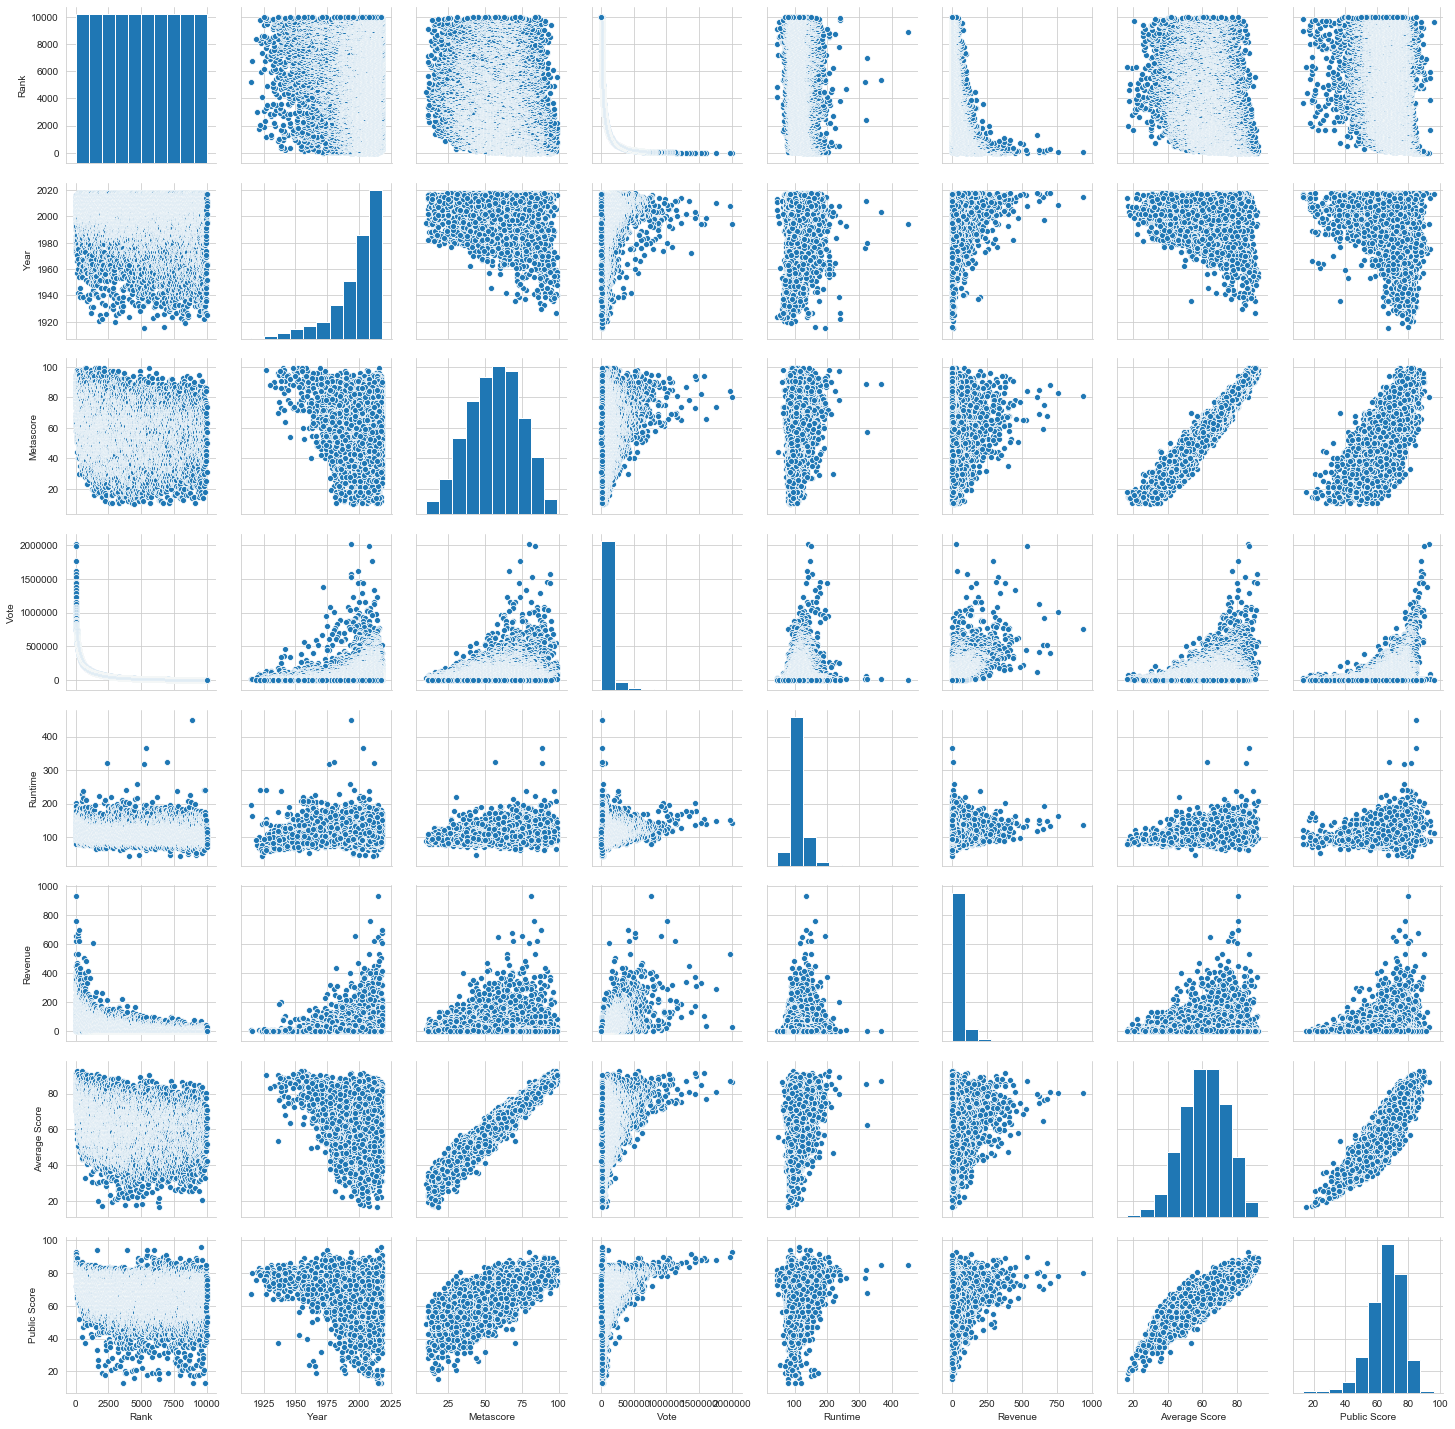

In [14]:
#To visualize the realtionship between ALL the variables
# PS :IT TAKES SOME TIME TO LOAD.. PLEASE BE PATIENT

#We named the plot in case we want to use it in a high quality print command (figure.savefig('PairPlot_HQ.png', dpi=400))
figure = sns.pairplot(data)
figure

##### Some are interesting to study !!! Let's digg deeper into them 

###### We can notice from the values,that the Rank isn't based on neither the Score or MetaScore, let's check if it is related to the number of voters Rank/Vote :

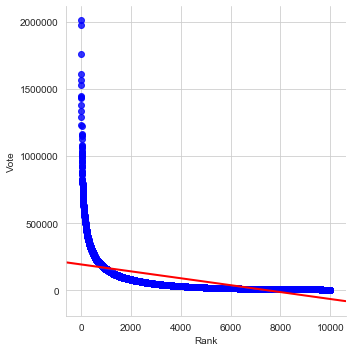

In [15]:
#Plotting the graph of the Rank according to the Votes
sns.lmplot('Rank','Vote',data,
          scatter_kws={'marker':'x','color':'blue'},
          line_kws={'linewidth':2,'color':'red'})

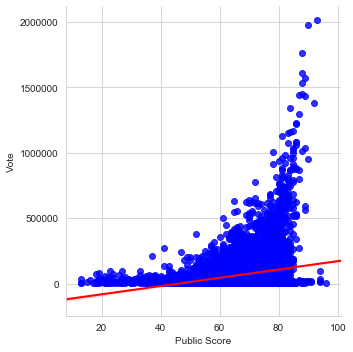

In [16]:
#Plotting the graph of the Public Scores according to the Votes
sns.lmplot('Public Score','Vote',data,
          scatter_kws={'marker':'x','color':'blue'},
          line_kws={'linewidth':2,'color':'red'})

###### The Rank is higher when the number of voters is high and The Score of the movie is higher when the number of voters is high. We can then conclude that the RANK IS BASED ON THE NUMBER OF VOTERS.
###### Let's then analyse the preference of the people, is it based on the Year?

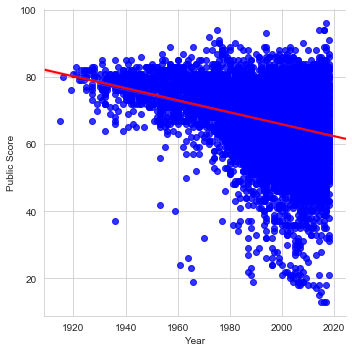

In [17]:
#Plotting the graph of the Public Score according to the Year
sns.lmplot('Year','Public Score',data,
          scatter_kws={'marker':'x','color':'blue'},
          line_kws={'linewidth':2,'color':'red'})

###### The lowest scores tend to be for NEW movies.People are putting higher scores for old movies... We can then conclude that people tend to agree more on old movies.
###### Let's now check how many movies are made in each year:

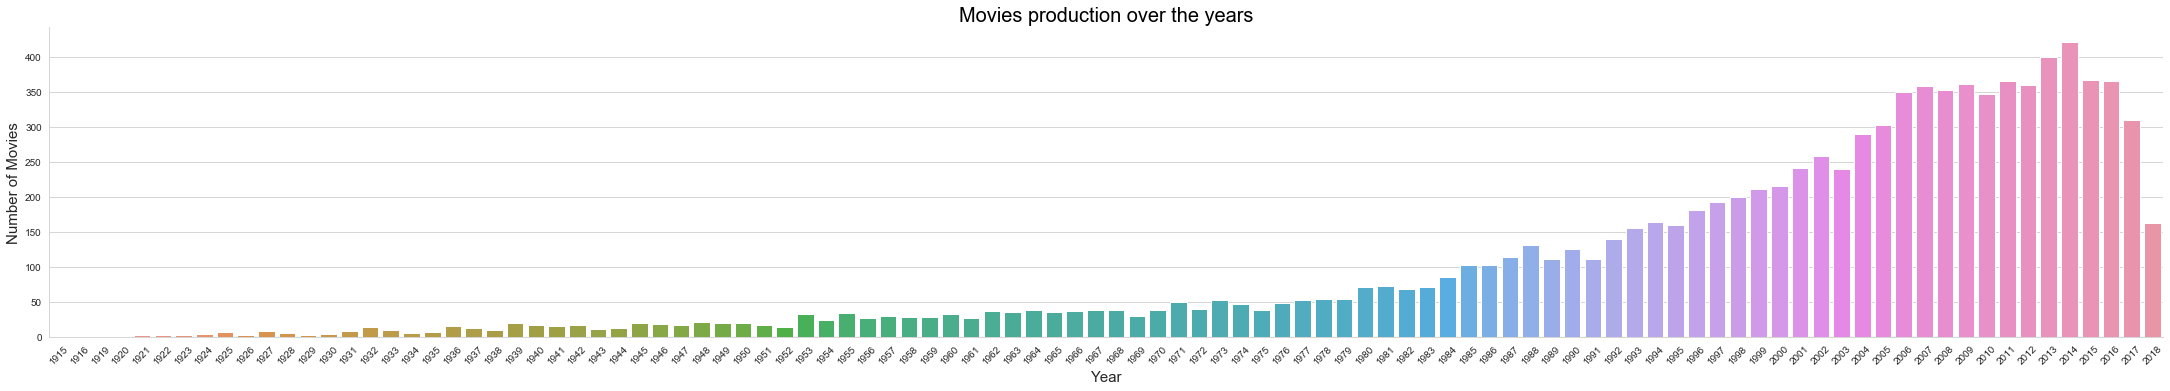

In [19]:
# Plotting the Graph of the numbers of movies per Year
graph = sns.catplot('Year',data=data,kind='count', aspect=6)
#Putting title and legend on the graph
plt.title('Movies production over the years',size= 20,color='black')
plt.xlabel('Year', size=15)
plt.ylabel('Number of Movies',size=15)
#Rotating the Year texts on x axis for better visualization
graph.set_xticklabels(rotation=45)
#To print the figure with high quality : graph.savefig('Movie Production over Years_HQ.png', dpi=400)

###### We can notice that more movies are being created over years, but people still tend to like older movies.. So I guess it's true what they say " OLD, BUT GOLD"

In [20]:
#This is a funny blank cell ;)

###### Now let's analyse the Public's Scores Vs the Critics' Scores
###### Let's Start with the Public's Scores:

Text(0, 0.5, 'Frequency')

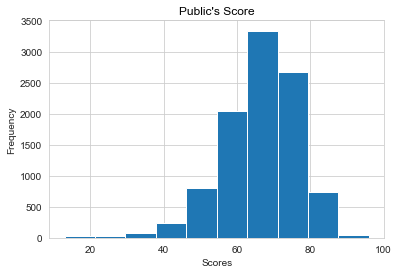

In [20]:
#Plotting the graph of the Scaled Scores
plt.hist(NewScore)
#putting title and legend on the graph
plt.title("Public's Score",size= 12,color='black')
plt.xlabel('Scores', size=10)
plt.ylabel('Frequency',size=10)

###### Most of the People's Scores are between 60 & 80.
###### Let's check the Critics' Scores:

Text(0, 0.5, 'Frequency')

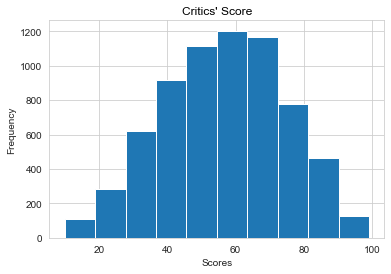

In [21]:
#Plotting the graph of the Metascore
plt.hist(Meta)
#put title and legend on the graph
plt.title("Critics' Score",size= 12,color='black')
plt.xlabel('Scores', size=10)
plt.ylabel('Frequency',size=10)

###### Let's visualize them together:

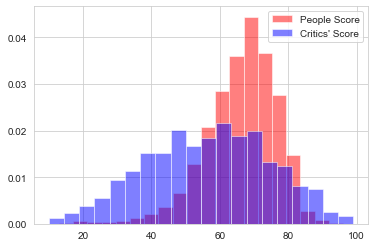

In [22]:
#Ploting Both Public score and Metascore
plt.hist(NewScore,density=True,color='red',alpha=0.5,bins=20)
plt.hist(Meta,density=True,color='blue',alpha=0.5,bins=20)
#Putting a legend
plt.legend(['People Score',"Critics' Score"])

###### The Critics scores are lower than the people's scores. It's also important to note that the Public rate over 10, or the critics rate over 100, maybe that's why we can capture that difference.
###### Let's check with antoher type of graphs:

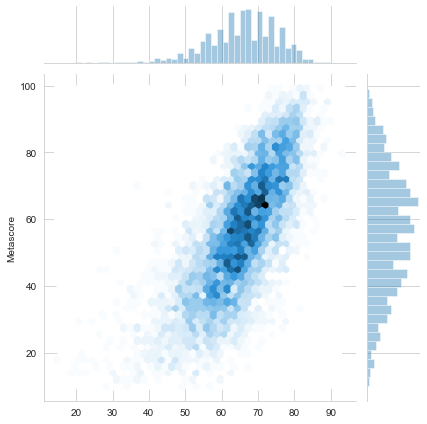

In [24]:
#Another type of graph combining the Public Scores and the Critics' Scores
sns.jointplot(NewScore,Meta,kind='hex')

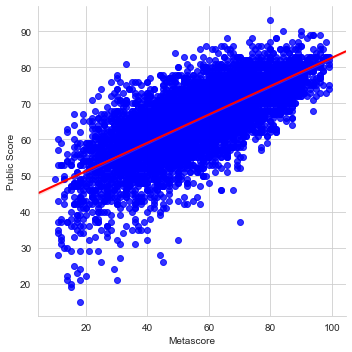

In [26]:
# Another type of graph; we can see here that Critics and the Public's ratings agree in most of the cases! 
sns.lmplot('Metascore','Public Score',data,
          scatter_kws={'marker':'o','color':'blue'},
          line_kws={'linewidth':2,'color':'red'})

###### We can notice that they are comperatively the same. Therefore, the public and critics tend to agree


###### Let's analyse the Revenue in relation with other values.
###### But first lets check if the Revenue values contain any NaN values:

In [27]:
#Sorting the data according to the Revenue
data.sort_values(by=['Revenue'])

,Rank,Title,Year,Metascore,Genre,Vote,Director,Runtime,Revenue,Description,Average Score,Public Score
6279,6280,Wrecked,2010,61.0,"Adventure, Drama, Mystery",14099,Michael Greenspan,91,0.0,A man trapped in a car wreck at the bottom of ...,57.0,53.0
4933,4934,Chalet Girl,2011,42.0,"Comedy, Romance, Sport",21650,Phil Traill,97,0.0,Former skateboard champion Kim wants to make m...,52.5,63.0
6901,6902,Singularity,2017,NaN,"Action, Adventure, Drama",11884,Robert Kouba,92,0.0,"In 2020, Elias van Dorne (John Cusack), CEO of...",NaN,40.0
9631,9632,Pawn,2013,NaN,"Action, Crime, Mystery",6421,David A. Armstrong,88,0.0,A petty robbery spirals into a tense hostage s...,NaN,57.0
7026,7027,Dou fo sin,2007,38.0,"Action, Crime, Thriller",11535,Wilson Yip,88,0.0,A hot-headed inspector takes on a small but po...,53.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,The Infidel,2010,57.0,"Comedy, Drama",6024,Josh Appignanesi,105,NaN,An identity crisis comedy centred on Mahmud Na...,60.5,64.0
9996,9997,Stachka,1925,NaN,Drama,6021,Sergei M. Eisenstein,95,NaN,A group of oppressed factory workers go on str...,NaN,76.0
9997,9998,November Criminals,2017,31.0,"Crime, Drama, Mystery",6020,Sacha Gervasi,85,NaN,"After his friend is murdered, a Washington, D....",42.0,53.0
9998,9999,120,2008,NaN,"Drama, History, War",6018,Özhan Eren,114,NaN,"During the Sarikamis Battle, the Ottoman army ...",NaN,73.0


###### OUPS! it seems that we have NaN and 0.00 values. So let's Remove them for a better analysis of the Revenue.
###### Let's start by replacing the NaN values with 0, and then remove all the movies with 0 values:

In [23]:
#Replacing the NaN values with 0
data_withNaN = data.fillna(0)
data_withNaN

,Rank,Title,Year,Metascore,Genre,Vote,Director,Runtime,Revenue,Description,Average Score,Public Score
0,1,The Shawshank Redemption,1994,80.0,Drama,2011509,Frank Darabont,142,28.34,Two imprisoned men bond over a number of years...,86.5,93.0
1,2,The Dark Knight,2008,84.0,"Action, Crime, Drama",1980200,Christopher Nolan,152,534.86,When the menace known as the Joker emerges fro...,87.0,90.0
2,3,Inception,2010,74.0,"Action, Adventure, Sci-Fi",1760209,Christopher Nolan,148,292.58,A thief who steals corporate secrets through t...,81.0,88.0
3,4,Fight Club,1999,66.0,Drama,1609459,David Fincher,139,37.03,An insomniac office worker and a devil-may-car...,77.0,88.0
4,5,Pulp Fiction,1994,94.0,"Crime, Drama",1570194,Quentin Tarantino,154,107.93,"The lives of two mob hitmen, a boxer, a gangst...",91.5,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,When Night Is Falling,1995,0.0,"Drama, Romance",6022,Patricia Rozema,94,1.19,"An uptight and conservative woman, working on ...",0.0,66.0
9996,9997,Stachka,1925,0.0,Drama,6021,Sergei M. Eisenstein,95,0.00,A group of oppressed factory workers go on str...,0.0,76.0
9997,9998,November Criminals,2017,31.0,"Crime, Drama, Mystery",6020,Sacha Gervasi,85,0.00,"After his friend is murdered, a Washington, D....",42.0,53.0
9998,9999,120,2008,0.0,"Drama, History, War",6018,Özhan Eren,114,0.00,"During the Sarikamis Battle, the Ottoman army ...",0.0,73.0


In [24]:
#Removing all the movies with 0 revenues by sorting the Revenue values 
RevenueSort =data_withNaN[data_withNaN.Revenue !=0]
RevenueSort.head()

,Rank,Title,Year,Metascore,Genre,Vote,Director,Runtime,Revenue,Description,Average Score,Public Score
0,1,The Shawshank Redemption,1994,80.0,Drama,2011509,Frank Darabont,142,28.34,Two imprisoned men bond over a number of years...,86.5,93.0
1,2,The Dark Knight,2008,84.0,"Action, Crime, Drama",1980200,Christopher Nolan,152,534.86,When the menace known as the Joker emerges fro...,87.0,90.0
2,3,Inception,2010,74.0,"Action, Adventure, Sci-Fi",1760209,Christopher Nolan,148,292.58,A thief who steals corporate secrets through t...,81.0,88.0
3,4,Fight Club,1999,66.0,Drama,1609459,David Fincher,139,37.03,An insomniac office worker and a devil-may-car...,77.0,88.0
4,5,Pulp Fiction,1994,94.0,"Crime, Drama",1570194,Quentin Tarantino,154,107.93,"The lives of two mob hitmen, a boxer, a gangst...",91.5,89.0


###### Great! Now that we cleared the NaN and zeros, let's sort the rest:

In [25]:
#Sorting the new Revenue without the 0 and NaN and showing only the head
RevenueSort.sort_values(by=['Revenue']).head()

,Rank,Title,Year,Metascore,Genre,Vote,Director,Runtime,Revenue,Description,Average Score,Public Score
7852,7853,El método,2005,68.0,"Comedy, Crime, Drama",9247,Marcelo Piñeyro,115,0.01,During IMF & World Bank Summit and demonstrati...,70.5,73.0
5061,5062,Barefoot,2014,22.0,"Comedy, Drama, Romance",20703,Andrew Fleming,90,0.01,"The ""black sheep"" son of a wealthy family meet...",44.0,66.0
8490,8491,The Babymakers,2012,30.0,Comedy,8005,Jay Chandrasekhar,95,0.01,"After failing to get his wife pregnant, a guy ...",40.0,50.0
4833,4834,The Lady from Shanghai,1947,0.0,"Crime, Drama, FilmNoir",22551,Orson Welles,87,0.01,"Fascinated by gorgeous Mrs. Bannister, seaman ...",0.0,77.0
9544,9545,Silent Night,2012,53.0,"Comedy, Horror, Mystery",6507,Steven C. Miller,94,0.01,The police force of a remote Midwestern town s...,52.5,52.0


###### Let's Check the Revenue according to other values:

###### Revenue/Vote:

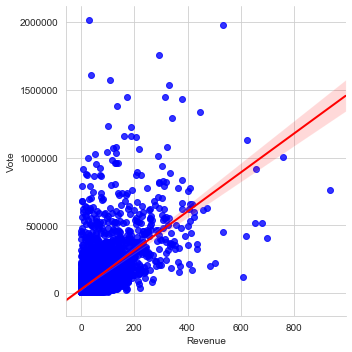

In [26]:
#Plotting the graph of the Revenue/Number of voters
sns.lmplot('Revenue','Vote',RevenueSort,
          scatter_kws={'marker':'x','color':'blue'},
          line_kws={'linewidth':2,'color':'red'})

###### The Revenue might not have a relationship with the number of Votes.
###### Let's Check the relationship with the Rank:

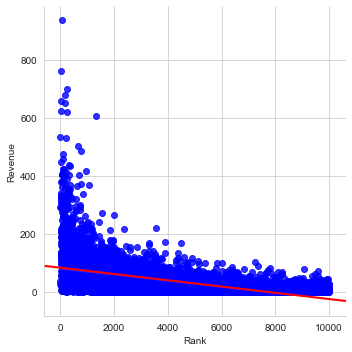

In [27]:
#Plotting the graph of the Revenue/Rank
sns.lmplot('Rank','Revenue',RevenueSort,
          scatter_kws={'marker':'x','color':'blue'},
          line_kws={'linewidth':2,'color':'red'})

###### Oh!! So the revenue is higher whenever the Rank is higher.

###### We noticed before that people tend to like older movies, Let's check The Year in relationship to the Revenue

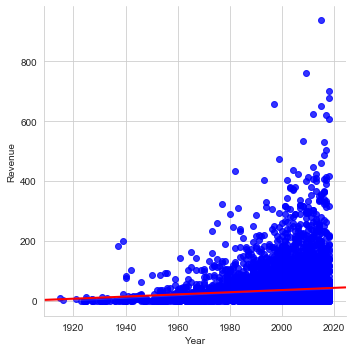

In [28]:
#Plotting the graph of the Revenue/Year
figure = sns.lmplot('Year','Revenue',RevenueSort,
          scatter_kws={'marker':'x','color':'blue'},
          line_kws={'linewidth':2,'color':'red'})
#figure.savefig('Revenue compared to the Production Year.png', dpi=400)

###### Hmm, The Revenue of older movies are much lower then the new ones,even though people tend to like them more.We can conclude that the cinema industry is becoming more and more profitable over time!
###### Finally , let's analyse how the Genre affects the different values ?

In [29]:
#Checking the data
data.head()

,Rank,Title,Year,Metascore,Genre,Vote,Director,Runtime,Revenue,Description,Average Score,Public Score
0,1,The Shawshank Redemption,1994,80.0,Drama,2011509,Frank Darabont,142,28.34,Two imprisoned men bond over a number of years...,86.5,93.0
1,2,The Dark Knight,2008,84.0,"Action, Crime, Drama",1980200,Christopher Nolan,152,534.86,When the menace known as the Joker emerges fro...,87.0,90.0
2,3,Inception,2010,74.0,"Action, Adventure, Sci-Fi",1760209,Christopher Nolan,148,292.58,A thief who steals corporate secrets through t...,81.0,88.0
3,4,Fight Club,1999,66.0,Drama,1609459,David Fincher,139,37.03,An insomniac office worker and a devil-may-car...,77.0,88.0
4,5,Pulp Fiction,1994,94.0,"Crime, Drama",1570194,Quentin Tarantino,154,107.93,"The lives of two mob hitmen, a boxer, a gangst...",91.5,89.0


###### Oups !! We can notice that some movies have several Genre.. For example Dark Knight --> Action,Crime,Drama. Let's keep only the main Genre of each movie for a better analysis:

In [46]:
#First ,we are grouping by
#Dropping the irrelevant columns
group_by_genre = data.groupby(['Genre','Title','Revenue','Vote','Rank','Public Score','Metascore','Average Score']).count().reset_index().drop(['Year','Director','Runtime','Description'],axis =1)
group_by_genre.head()

,Genre,Title,Revenue,Vote,Rank,Public Score,Metascore,Average Score
0,Action,Ong-bak 2,0.10,27162,4357,62.0,47.0,54.5
1,Action,Ong-bak 3,0.01,11786,6936,50.0,38.0,44.0
2,Action,Redline,6.88,8286,8345,40.0,24.0,32.0
3,Action,The Man with the Iron Fists,15.63,57491,2649,54.0,51.0,52.5
4,"Action, Adventure",Batman,251.19,303963,415,76.0,69.0,72.5


In [47]:
#Creating a loop to split the text in genre by the comma. For example Action,Adventure --> Action.
#This will help us keep only the main genre
by_genre = group_by_genre
for i in range(len(by_genre['Genre'])):
    element = by_genre['Genre'][i].split(',')[0]
    by_genre['Genre'][i] = element
by_genre.head()

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Genre,Title,Revenue,Vote,Rank,Public Score,Metascore,Average Score
0,Action,Ong-bak 2,0.10,27162,4357,62.0,47.0,54.5
1,Action,Ong-bak 3,0.01,11786,6936,50.0,38.0,44.0
2,Action,Redline,6.88,8286,8345,40.0,24.0,32.0
3,Action,The Man with the Iron Fists,15.63,57491,2649,54.0,51.0,52.5
4,Action,Batman,251.19,303963,415,76.0,69.0,72.5


In [48]:
#Checking
by_genre.tail()

,Genre,Title,Revenue,Vote,Rank,Public Score,Metascore,Average Score
6120,Western,For a Few Dollars More,15.00,195742,780,83.0,74.0,78.5
6121,Western,Once Upon a Time in the West,5.32,260576,522,85.0,80.0,82.5
6122,Western,Pale Rider,41.41,45943,3093,73.0,61.0,67.0
6123,Western,"The Good, the Bad and the Ugly",6.10,596164,112,89.0,90.0,89.5
6124,Western,The Outlaw Josey Wales,31.80,58040,2624,79.0,69.0,74.0


###### Great!!! Now that we have only the Main Genre .. Let's check the count of each movie by genre:

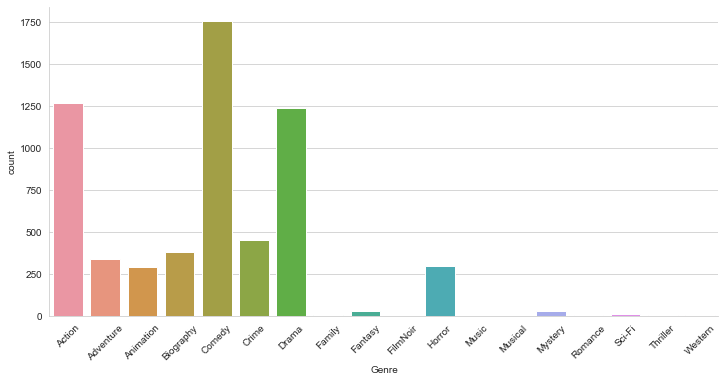

In [50]:
#Plotting the Graph, Genre / numbers of movies
graph_genre = sns.catplot('Genre',data=by_genre,kind='count',aspect=2)
#Rotating the name of the genre on the x axis for a better readability
graph_genre.set_xticklabels(rotation=45)
#In case we want to print in high quality : graph_genre.savefig ('Movie Production based on Genre_HQ.png', dpi=400)

###### Looks like the Comedy,Drama and Action are the most popular on IMDb.. Let's focus our analysis on them for a better results:
###### Let's Check the movie that has the highest Rank in each of them :
###### Action Movies:

In [51]:
#First we are grouping by Action
only_action = by_genre [by_genre.Genre == 'Action']
only_action.head()

,Genre,Title,Revenue,Vote,Rank,Public Score,Metascore,Average Score
0,Action,Ong-bak 2,0.10,27162,4357,62.0,47.0,54.5
1,Action,Ong-bak 3,0.01,11786,6936,50.0,38.0,44.0
2,Action,Redline,6.88,8286,8345,40.0,24.0,32.0
3,Action,The Man with the Iron Fists,15.63,57491,2649,54.0,51.0,52.5
4,Action,Batman,251.19,303963,415,76.0,69.0,72.5


In [52]:
#Then sorting the values according to the rank
only_action.sort_values(by=['Rank']).head()

,Genre,Title,Revenue,Vote,Rank,Public Score,Metascore,Average Score
804,Action,The Dark Knight,534.86,1980200,2,90.0,84.0,87.0
368,Action,Inception,292.58,1760209,3,88.0,74.0,81.0
1195,Action,The Matrix,171.48,1443130,8,87.0,73.0,80.0
196,Action,The Lord of the Rings: The Return of the King,377.85,1431887,9,89.0,94.0,91.5
1252,Action,The Dark Knight Rises,448.14,1338413,11,84.0,78.0,81.0


###### Looks like The Dark Knight have the highest Rank among Action Movies.
###### Let's now check the Comedies:

In [53]:
#First we are grouping by Comedy
only_comedy = by_genre [by_genre.Genre == 'Comedy']
only_comedy.head()

,Genre,Title,Revenue,Vote,Rank,Public Score,Metascore,Average Score
2277,Comedy,21 & Over,25.68,67236,2349,59.0,34.0,46.5
2278,Comedy,9 to 5,103.29,23684,4698,68.0,58.0,63.0
2279,Comedy,A Cock and Bull Story,1.25,11796,6929,68.0,80.0,74.0
2280,Comedy,A Dirty Shame,1.34,11439,7054,51.0,56.0,53.5
2281,Comedy,A Midsummer Night's Sex Comedy,9.08,16766,5718,67.0,51.0,59.0


In [54]:
#Then sorting the values according to the rank
only_comedy.sort_values(by=['Rank']).head()

,Genre,Title,Revenue,Vote,Rank,Public Score,Metascore,Average Score
3497,Comedy,The Truman Show,125.62,803859,52,81.0,90.0,85.5
2557,Comedy,Snatch,30.33,696147,74,83.0,55.0,69.0
2468,Comedy,The Hangover,277.32,650821,86,77.0,73.0,75.0
2564,Comedy,The Big Lebowski,17.50,636671,92,81.0,71.0,76.0
3789,Comedy,Amélie,33.23,630513,94,83.0,69.0,76.0


###### Wow!! Looks like The Trueman Show have the highest rank among the comedy movies
##### Let's now check the Drama:

In [55]:
#First we are grouping by Drama
only_drama = by_genre [by_genre.Genre == 'Drama']
only_drama.head()

,Genre,Title,Revenue,Vote,Rank,Public Score,Metascore,Average Score
4483,Drama,12 and Holding,0.10,6430,9620,76.0,65.0,70.5
4484,Drama,120 BPM (Beats Per Minute),0.13,9101,7907,75.0,84.0,79.5
4485,Drama,25th Hour,13.06,160536,1001,77.0,67.0,72.0
4486,Drama,"4 luni, 3 saptamâni si 2 zile",1.19,50743,2879,79.0,97.0,88.0
4487,Drama,99 Homes,1.41,25568,4505,71.0,76.0,73.5


In [56]:
#Then sorting the values according to the rank
only_drama.sort_values(by=['Rank']).head()

,Genre,Title,Revenue,Vote,Rank,Public Score,Metascore,Average Score
4722,Drama,The Shawshank Redemption,28.34,2011509,1,93.0,80.0,86.5
4552,Drama,Fight Club,37.03,1609459,4,88.0,66.0,77.0
5323,Drama,Forrest Gump,330.25,1532024,6,88.0,82.0,85.0
5716,Drama,Django Unchained,162.81,1159647,16,84.0,81.0,82.5
5702,Drama,Saving Private Ryan,216.54,1060126,22,86.0,90.0,88.0


###### The Shawshank Redemption has the highest rank among the drama movies

###### Let's see which Genre of those 3, earns the most and have the highest number of voters by calculating the average Revenue/Votes of all movies in each genre:

In [58]:
#Grouping by Genre then Calculating the mean( the average) revenue and mean vote
data_final = by_genre.groupby(['Genre'],as_index=False).agg({'Revenue': 'mean','Vote':'mean'})
data_final

,Genre,Revenue,Vote
0,Action,68.764779,141432.463665
1,Adventure,64.565162,138332.020649
2,Animation,96.850069,118953.233677
3,Biography,27.833412,81856.089239
4,Comedy,31.080222,57930.883694
5,Crime,22.616881,108954.365044
6,Drama,22.623603,75531.503231
7,Family,164.226667,123361.166667
8,Fantasy,24.918750,49222.687500
9,FilmNoir,0.450000,138067.000000


In [59]:
#Selecting only Comedy,Drama,Action by calling their index:
data_final_1 = data_final.iloc[[0,4,6],[0,1,2]]
data_final_1


,Genre,Revenue,Vote
0,Action,68.764779,141432.463665
4,Comedy,31.080222,57930.883694
6,Drama,22.623603,75531.503231


In [60]:
#Sorting the values acording to the Revenue
data_final_1.sort_values(by=['Revenue'],ascending =False)

,Genre,Revenue,Vote
0,Action,68.764779,141432.463665
4,Comedy,31.080222,57930.883694
6,Drama,22.623603,75531.503231


###### WOW! looks like Action movies earn the most.. lets see if they get the highest number of voters:

In [61]:
#Sorting the values acording to the Vote
data_final_1.sort_values(by=['Vote'],ascending =False)

,Genre,Revenue,Vote
0,Action,68.764779,141432.463665
6,Drama,22.623603,75531.503231
4,Comedy,31.080222,57930.883694


###### So Action movies earn the most and are receiving the highest number of voters.

## 2) MOVIE NIGHT: ALLOWING A USER TO QUERY A MOVIE'S INFORMATIONS

###### Now that we analysed the Data , Let's go watch a movie !!!!
###### We created a function where users can input the name of the movie they want to watch, and then receive relevant informations about it:)
###### and if the movie's name is incorrect, he can receive a close suggestion: For example 'Dark knight' ---> Suggestion : 'The Dark Knight Rises'

In [6]:
##function that handles movie input and displays relevant informations
def get_movie(movie,data):
    #creating a list containing the titles of the movies in the dataset
    movie_list = list(data['Title'])
    #creating a list of lowercased titles to make casing irrelevant to detection
    movie_list_lower = [title.lower() for title in movie_list]
    #lower case movie to make casing irrelevant to detection
    movie = movie.lower()
    
    #The movie is in the dataset, get the index and return the row
    if movie in movie_list_lower:
        index = movie_list_lower.index(movie)
        return data.loc[[index]]
    
    #list containing movie titles that contain the user's input movie 
    #for example "dark knight" is contained in "the dark knight"
    #Creating an empty list
    matching = []
    #loop through lowercased existing movies
    for existing_movie in movie_list_lower:
        #check if input movie is substring of current looped over movie
        if movie in existing_movie:
            index = movie_list_lower.index(existing_movie)
            #Append original name (not lowercased) of the movie to the list of matching movies
            matching.append(movie_list[index])
    #case where there are available suggestions
    if len(matching) != 0:
        print("Did you mean one of the following?")
        for i in range(len(matching)):
            print(str(i) + ". " + matching[i])
        user_choice = input("Press the number of the movie or press other key to exit ")
        #check if user inputed relevant number
        if user_choice.isdigit() and int(user_choice)<len(matching) and int(user_choice)>=0:
            #call the function again on existing chosen movie by the user
            return get_movie(matching[int(user_choice)], data)
        #user didn't choose/want any of the suggestions
        return "Not Found"
    else:
        #no suggestions are available
        return "Not Found, Check if the spelling is correct"

### BONUS: MOVIE NIGHT! Try out the cell below

In [9]:
user_input = input("What movie would you like to watch tonight? ")
get_movie(user_input, data)

What movie would you like to watch tonight? dark knight
Did you mean one of the following?
0. The Dark Knight
1. The Dark Knight Rises
Press the number of the movie or press other key to exit 1


,Rank,Title,Year,Score,Metascore,Genre,Vote,Director,Runtime,Revenue,Description
10,11,The Dark Knight Rises,2012,8.4,78.0,"Action, Thriller",1338413,Christopher Nolan,164,448.14,Eight years after the Joker's reign of anarchy...
